# 20180110 - My Neural Network Lab notes

In [1]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)

Using TensorFlow backend.


## Data
Keras include sample datasets, e.g. movie revies from IMDB

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). 

Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

Usage:

```python
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)
```

Returns:

2 tuples:

x_train, x_test: list of sequences, which are lists of indexes (integers). If the num_words argument was specific, the maximum possible index value is num_words-1. If the maxlen argument was specified, the largest possible sequence length is maxlen.

y_train, y_test: list of integer labels (1 or 0).


Arguments:
path: if you do not have the data locally (at '~/.keras/datasets/' + path), it will be downloaded to this location.

num_words: integer or None. Top most frequent words to consider. Any less frequent word will appear as oov_char value in the sequence data.

skip_top: integer. Top most frequent words to ignore (they will appear as oov_char value in the sequence data).

maxlen: int. Maximum sequence length. Any longer sequence will be truncated.

seed: int. Seed for reproducible data shuffling.

start_char: int. The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.

oov_char: int. words that were cut out because of the num_words or skip_top limit will be replaced with this character.

index_from: int. Index actual words with this index and higher.

In [11]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print('\nLength of data vector')
print(len(x_train))

print('Shape of data vectors:')
print(x_train.shape)
print(x_test.shape)

print('\nFirst element of data vectors')
print(x_train[0])
print(y_train[0])


Length of data vector
25000
Shape of data vectors:
(25000,)
(25000,)

First element of data vectors
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## Data encoding
Converting the input vectors into one-hot encoded vectors. 

0	00000001

1	00000010

2	00000100

https://en.wikipedia.org/wiki/One-hot


In [12]:
tokenizer = Tokenizer(num_words=1000)

x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(25000, 1000)
(25000, 1000)
(25000, 2)
(25000, 2)


## Neural net model

In [13]:
# sequential model architecture with one layer of length 100
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 513,538.0
Trainable params: 513,538.0
Non-trainable params: 0.0
_________________________________________________________________


## Model training

In [14]:
hist = model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 3s - loss: 0.3967 - acc: 0.8255 - val_loss: 0.3427 - val_acc: 0.8580
Epoch 2/10
25000/25000 [==============================] - 2s - loss: 0.3344 - acc: 0.8664 - val_loss: 0.3422 - val_acc: 0.8637
Epoch 3/10
25000/25000 [==============================] - 2s - loss: 0.3223 - acc: 0.8784 - val_loss: 0.3548 - val_acc: 0.8612
Epoch 4/10
25000/25000 [==============================] - 2s - loss: 0.3105 - acc: 0.8856 - val_loss: 0.3726 - val_acc: 0.8602
Epoch 5/10
25000/25000 [==============================] - 2s - loss: 0.3051 - acc: 0.8904 - val_loss: 0.4121 - val_acc: 0.8554
Epoch 6/10
25000/25000 [==============================] - 2s - loss: 0.2978 - acc: 0.8969 - val_loss: 0.3929 - val_acc: 0.8602
Epoch 7/10
25000/25000 [==============================] - 2s - loss: 0.2879 - acc: 0.9040 - val_loss: 0.4132 - val_acc: 0.8590
Epoch 8/10
25000/25000 [==============================] - 2s 

## Model evaluation

Quick visualization of model training history


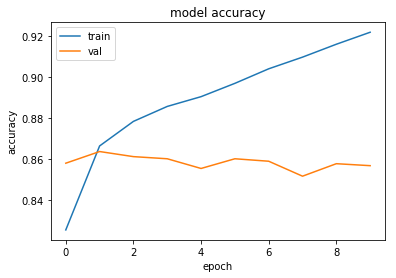

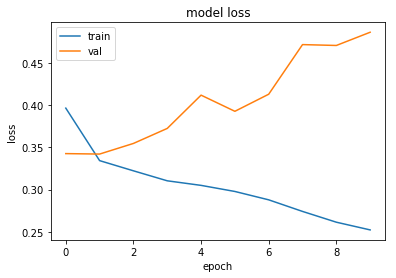

accuracy:  0.8568


In [17]:
print('Quick visualization of model training history')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print("accuracy: ", score[1])

## Prediction

Take a look at model.predict function

predict(self, x, batch_size=None, verbose=0, steps=None)

Generates output predictions for the input samples.

The input samples are processed batch by batch.

Arguments

x: the input data, as a Numpy array.

batch_size: Integer. If unspecified, it will default to 32.

verbose: verbosity mode, 0 or 1.

steps: Total number of steps (batches of samples) before declaring the prediction round finished. Ignored with the default value of None.

Returns

A Numpy array of predictions.

In [22]:
# TODO - correct the output of predict function

prediction = model.predict(x_train)
print(prediction)
print(len(prediction))

[[  3.89038888e-03   9.96109664e-01]
 [  9.94147539e-01   5.85240684e-03]
 [  9.99389052e-01   6.10984396e-04]
 ..., 
 [  9.99670982e-01   3.29033152e-04]
 [  3.45729035e-03   9.96542752e-01]
 [  8.86964262e-01   1.13035776e-01]]
25000


# More advance exmaple

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews